In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

df= pd.read_csv('laptop_data.csv')

nilaiTukar = 200
df['Price'] = df['Price'] * nilaiTukar

In [2]:
df.drop(columns={'Unnamed: 0'}, inplace = True)
df.head(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,14275736.64
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,9579104.64
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,6127200.00
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,27039067.20
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,19219161.60


In [3]:
df.describe(include='O')

,Company,TypeName,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
count,1303,1303,1303,1303,1303,1303,1303,1303,1303
unique,19,6,40,118,9,39,110,9,179
top,Dell,Notebook,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,2.2kg
freq,297,727,507,190,619,412,281,1072,121


In [4]:
df[df.isnull().any(axis=1)]
df.dropna(inplace=True)

In [5]:
df.duplicated().sum()

29

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
cats = df.select_dtypes(include='O').columns
for i in cats:
    if df[i].nunique() <= 199:
        print('Value Counts in ',i)
        print(df[i].value_counts())
        print('-----------------------------------------')

Value Counts in  Company
Company
Dell         291
Lenovo       289
HP           268
Asus         151
Acer         101
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: count, dtype: int64
-----------------------------------------
Value Counts in  TypeName
TypeName
Notebook              706
Gaming                205
Ultrabook             194
2 in 1 Convertible    117
Workstation            29
Netbook                23
Name: count, dtype: int64
-----------------------------------------
Value Counts in  ScreenResolution
ScreenResolution
Full HD 1920x1080                                505
1366x768                                         262
IPS Panel Full HD 1920x1080                      226
IPS Panel Full HD / Touchscreen 1920x1080         51
Full HD / Touchscreen 1920x1080                   47
1

In [8]:
df.replace('?',np.nan,inplace=True)

In [9]:
## Removing Characters of Ram , Inches
df['Ram'] = df['Ram'].str.replace('GB', '')
df['Weight'] = df['Weight'].str.replace('kg', '')

## Changing their values to numerical values
df['Ram']=pd.to_numeric(df['Ram'], errors='coerce')
df['Weight']=pd.to_numeric(df['Weight'],errors='coerce')
df['Inches']= pd.to_numeric(df['Inches'],errors='coerce')

## Rename Columns
df.rename(columns={'Ram':'RamGB','Weight' :'WeightKG'}, inplace=True)

In [10]:
## Extracting GHz from Cpu 
df['GHz'] = df['Cpu'].str.extract(r'(\d+(?:\.\d+)?GHz)') 
df['GHz'] = df['GHz'].str.replace(r'GHz','',regex=True)

## Converting GHz column to numeric
df['GHz'] = pd.to_numeric(df['GHz'],errors='coerce')

## Removing GHz from original Cpu
df['Cpu'] = df['Cpu'].str.replace(r'(\d+(?:\.\d+)?GHz)','',regex=True) 

In [11]:
df['CpuBrand']= df['Cpu'].str.extract(r'^(\w+)')
df['CpuVersion'] = df['Cpu'].str.replace(r'^(\w+)','',regex=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1274 entries, 0 to 1273
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1274 non-null   object 
 1   TypeName          1274 non-null   object 
 2   Inches            1274 non-null   float64
 3   ScreenResolution  1274 non-null   object 
 4   Cpu               1274 non-null   object 
 5   RamGB             1274 non-null   int64  
 6   Memory            1274 non-null   object 
 7   Gpu               1274 non-null   object 
 8   OpSys             1274 non-null   object 
 9   WeightKG          1274 non-null   float64
 10  Price             1274 non-null   float64
 11  GHz               1274 non-null   float64
 12  CpuBrand          1274 non-null   object 
 13  CpuVersion        1274 non-null   object 
dtypes: float64(4), int64(1), object(9)
memory usage: 149.3+ KB


In [12]:
df.drop(columns={'Cpu'},inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1274 entries, 0 to 1273
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1274 non-null   object 
 1   TypeName          1274 non-null   object 
 2   Inches            1274 non-null   float64
 3   ScreenResolution  1274 non-null   object 
 4   RamGB             1274 non-null   int64  
 5   Memory            1274 non-null   object 
 6   Gpu               1274 non-null   object 
 7   OpSys             1274 non-null   object 
 8   WeightKG          1274 non-null   float64
 9   Price             1274 non-null   float64
 10  GHz               1274 non-null   float64
 11  CpuBrand          1274 non-null   object 
 12  CpuVersion        1274 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage: 139.3+ KB


In [13]:
## Remove GB & TB from Numbers
df['Memory'] = df['Memory'].str.replace(r'GB|\.0', '' ,regex=True)
df['Memory'] = df['Memory'].str.replace(r'TB','000',regex=True)

In [14]:
## Main & Extra Memory column creation
df['MainMemory']= df['Memory'].str.replace(r' ','').str.split('+', n = 1, expand = True)[0]
df['SecondMemory']=df['Memory'].str.replace(r' ','').str.split('+', n = 1, expand = True)[1]

In [15]:
## Main & Extra Memories type
df['MainMemoryType'] = df['MainMemory'].str.extract(r'(\D+)')
df['SecondMemoryType'] = df['SecondMemory'].str.extract(r'(\D+)')

## Removing Type from Memory Columns
df['MainMemory'] = df['MainMemory'].str.extract(r'(\d+)',)
df['SecondMemory'] = df['SecondMemory'].str.extract(r'(\d+)',)

## Changing Memory to Numerical 
df['MainMemory'] = pd.to_numeric(df['MainMemory'],errors='coerce')
df['SecondMemory']= pd.to_numeric(df['SecondMemory'],errors= 'coerce')

df.drop(columns={'Memory'},inplace=True)

In [16]:
df['SecondMemory'].replace(np.nan,0,inplace=True)
df['MainMemory'].replace(np.nan,0,inplace=True)
df['SecondMemoryType'].replace(np.nan,'None',inplace=True)

In [17]:
## TouchScreen Column
df['TouchScreen'] =df["ScreenResolution"].str.contains("TouchScreen", na=False, case=False)

## Change it into 1 and 0
df['TouchScreen'] = df['TouchScreen'].astype(int)

In [18]:
df['Resolution'] = df['ScreenResolution'].str.extract(r'(\d+x\d+)')
## Removing all Features from cell , leaving only Panel Type
df['PanelType'] = df['ScreenResolution'].replace(r'(Full HD|Quad HD|Quad HD|\+|/|4K Ultra HD|Touchscreen|(\d+x\d+))','',regex=True)

In [19]:
## Combining all Values of IPS Panal
df['PanelType'] = df['PanelType'].replace(r' ','',regex=True)

In [20]:
## replace '' , with Nan
df['PanelType'] = df['PanelType'].replace(r'^\s*$', 'Without', regex=True)

In [21]:
df.drop(columns={'ScreenResolution'},inplace=True)

In [22]:
df['MainMemory'] = pd.to_numeric(df['MainMemory'],errors='coerce')

In [23]:
df['GpuBrand'] = df['Gpu'].str.extract(r'^(\w+)')
df['GpuVersion'] = df['Gpu'].str.replace(r'^(\w+)','',regex=True)
df.drop(columns={'Gpu'},inplace=True)

In [24]:
## Creating a data frame by grouping
df1=df.groupby(['Company'])['TypeName'].value_counts().to_frame().sort_values(by='count',ascending=False)
df1=df1.reset_index()
df1

## Creating a bar chart to Vis

fig= px.bar( df1 , x=df1['TypeName'] ,y= df1['count'], color='Company', barmode = 'group')
fig.update_xaxes(title='Type ')
fig.update_yaxes(title='Total Sales')


In [25]:
## Create a data frame with average price of each laptop
df1= df.groupby('Company')['Price'].mean().reset_index().nlargest(10,'Price')

## Create a bar chart with to Visu

px.bar(df1 ,
        x=df1['Company'] , 
        y='Price',
        title='Brands with their avg Price')


In [26]:
## Creating a bar chart graph 
fig= px.scatter( df, x=df['RamGB'],
            y= df['Price'] ,trendline="ols" )
fig.update_xaxes(title='RAM')
fig.update_yaxes(title='Average Price')

In [27]:
## Correlation map
df.corr(numeric_only=True).T

,Inches,RamGB,WeightKG,Price,GHz,MainMemory,SecondMemory,TouchScreen
Inches,1.000000,0.241441,0.826634,0.066990,0.305733,0.263997,0.389275,-0.361873
RamGB,0.241441,1.000000,0.389658,0.740106,0.365688,0.017675,0.390832,0.111378
WeightKG,0.826634,0.389658,1.000000,0.212192,0.319162,0.174804,0.481593,-0.293933
Price,0.066990,0.740106,0.212192,1.000000,0.428178,-0.121628,0.291031,0.188631
GHz,0.305733,0.365688,0.319162,0.428178,1.000000,0.058051,0.224211,-0.092330
MainMemory,0.263997,0.017675,0.174804,-0.121628,0.058051,1.000000,-0.245173,-0.024796
SecondMemory,0.389275,0.390832,0.481593,0.291031,0.224211,-0.245173,1.000000,-0.135370
TouchScreen,-0.361873,0.111378,-0.293933,0.188631,-0.092330,-0.024796,-0.135370,1.000000


In [28]:
## Correlation data frame with price
df3 = df.corr(numeric_only=True)['Price'].sort_values(ascending=False).reset_index()
df3

,index,Price
0,Price,1.000000
1,RamGB,0.740106
2,GHz,0.428178
3,SecondMemory,0.291031
4,WeightKG,0.212192
5,TouchScreen,0.188631
6,Inches,0.066990
7,MainMemory,-0.121628


In [29]:
## Correlation Between Each feature
px.imshow(df.corr(numeric_only=True),text_auto=True)

In [30]:
df.quantile(numeric_only=True,q=[0.05,0.1,0.4,0.5,0.7, 0.8, 0.9, 0.95, 0.99, 0.995,1]).T

,0.050,0.100,0.400,0.500,0.700,0.800,0.900,0.950,0.990,0.995,1.000
Inches,12.500,1.330000e+01,15.600,15.60,1.560000e+01,15.6,17.30,17.3,17.30,1.730000e+01,18.4
RamGB,4.000,4.000000e+00,8.000,8.00,8.000000e+00,8.0,16.00,16.0,32.00,3.200000e+01,64.0
WeightKG,1.170,1.254400e+00,1.900,2.04,2.201000e+00,2.4,2.80,3.2,4.42,4.420000e+00,4.7
Price,3445047.504,4.251637e+06,8867944.512,10538784.00,1.437494e+07,17784864.0,21833824.32,26096544.0,33570129.60,4.055494e+07,64990944.0
GHz,1.200,1.600000e+00,2.400,2.50,2.600000e+00,2.7,2.80,2.8,3.00,3.100000e+00,3.6
MainMemory,64.000,1.280000e+02,256.000,256.00,5.120000e+02,1000.0,1000.00,1000.0,2000.00,2.000000e+03,2000.0
SecondMemory,0.000,0.000000e+00,0.000,0.00,0.000000e+00,0.0,1000.00,1000.0,2000.00,2.000000e+03,2000.0
TouchScreen,0.000,0.000000e+00,0.000,0.00,0.000000e+00,0.0,1.00,1.0,1.00,1.000000e+00,1.0


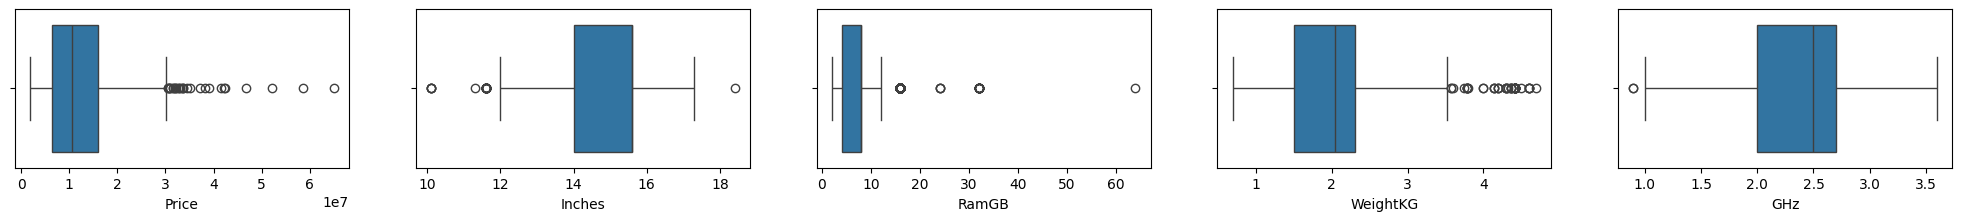

In [31]:
## visualizing  Outliers
numout = ['Price','Inches','RamGB','WeightKG','GHz']
plt.figure(figsize = (25 , 7))
for i , col in enumerate(numout,1):
    plt.subplot(3,5,i)
    sns.boxplot(data = df, x= col)

In [32]:
# df = df[(df['Price']<3000)]
# df = df[ (df['Inches']<30) ]
# df = df[(df['WeightKG'] <10)]
# df = df[(df['RamGB']<40)]

In [33]:
df.quantile(numeric_only=True,q=[0.05,0.1,0.4,0.5,0.7, 0.8, 0.9, 0.95, 0.99, 0.995,1]).T

,0.050,0.100,0.400,0.500,0.700,0.800,0.900,0.950,0.990,0.995,1.000
Inches,12.500,1.330000e+01,15.600,15.60,1.560000e+01,15.6,17.30,17.3,17.30,1.730000e+01,18.4
RamGB,4.000,4.000000e+00,8.000,8.00,8.000000e+00,8.0,16.00,16.0,32.00,3.200000e+01,64.0
WeightKG,1.170,1.254400e+00,1.900,2.04,2.201000e+00,2.4,2.80,3.2,4.42,4.420000e+00,4.7
Price,3445047.504,4.251637e+06,8867944.512,10538784.00,1.437494e+07,17784864.0,21833824.32,26096544.0,33570129.60,4.055494e+07,64990944.0
GHz,1.200,1.600000e+00,2.400,2.50,2.600000e+00,2.7,2.80,2.8,3.00,3.100000e+00,3.6
MainMemory,64.000,1.280000e+02,256.000,256.00,5.120000e+02,1000.0,1000.00,1000.0,2000.00,2.000000e+03,2000.0
SecondMemory,0.000,0.000000e+00,0.000,0.00,0.000000e+00,0.0,1000.00,1000.0,2000.00,2.000000e+03,2000.0
TouchScreen,0.000,0.000000e+00,0.000,0.00,0.000000e+00,0.0,1.00,1.0,1.00,1.000000e+00,1.0


<Axes: xlabel='Price', ylabel='Count'>

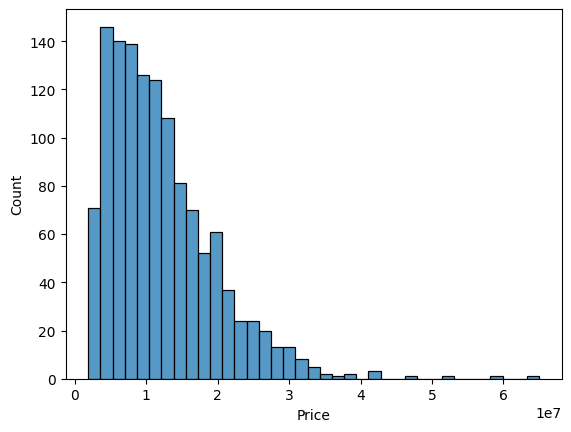

In [34]:
sns.histplot(df['Price'])

In [35]:
features = ['RamGB', 'Inches', 'WeightKG', 'GHz']  # Fitur untuk prediksi harga
X = df[features]
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

r_squared = r2_score(y_test, predictions)
mse = mean_squared_error(y_test, predictions)

print(f"R-squared: {r_squared}")
print(f"Mean Squared Error: {mse}")

import pickle
filename = 'modelPrediksi.sav'
pickle.dump(model, open(filename, 'wb'))

R-squared: 0.587070180161446
Mean Squared Error: 28305065348789.27
